In [1]:
#설치후 세션 다시시작
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (9,256 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126332 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
train_df = pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [2]:
train_df['기업가치(백억원)'] = pd.to_numeric(train_df['기업가치(백억원)'].astype(str).str[:4], errors='coerce').astype(float)
test_df['기업가치(백억원)'] = pd.to_numeric(test_df['기업가치(백억원)'].astype(str).str[:4], errors='coerce').astype(float)

In [3]:
train_df.isnull().sum()

,0
ID,0
설립연도,0
국가,0
분야,857
투자단계,0
직원 수,174
인수여부,0
상장여부,0
고객수(백만명),1320
총 투자금(억원),0


<ipython-input-4-18a1e40b6e36>:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


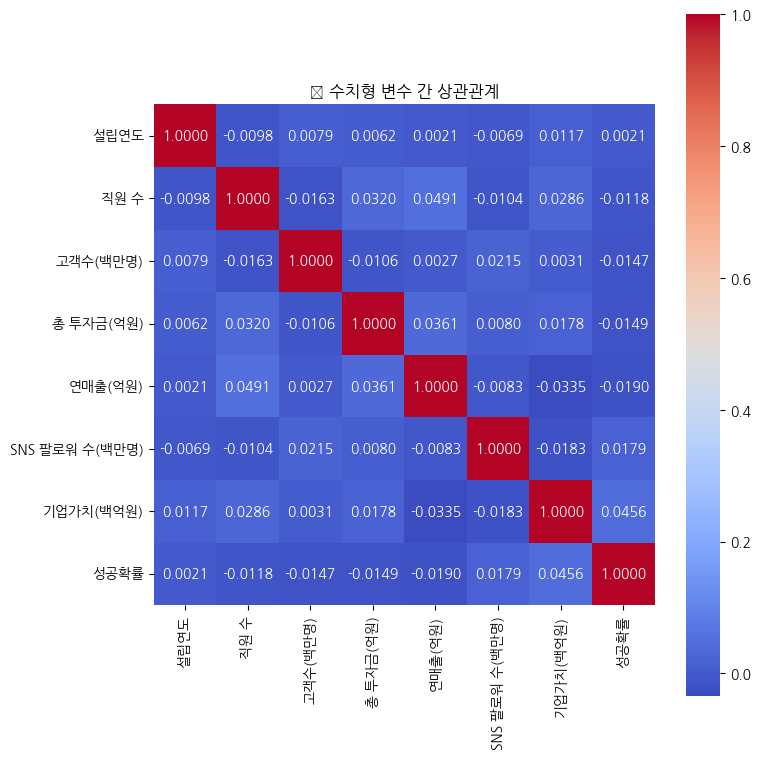

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# 수치형 변수만 추출
num_cols = train_df.select_dtypes(include=['number'])

# 상관관계 행렬 계산
corr_matrix = num_cols.corr()

# 시각화
plt.figure(figsize=(8, 8))

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

sns.heatmap(corr_matrix, annot=True, fmt=".4f", cmap='coolwarm', square=True)
plt.title("📊 수치형 변수 간 상관관계")
plt.tight_layout()
plt.show()


In [5]:
import numpy as np

# 분야: '미상'으로 채우기
train_df['분야'] = train_df['분야'].fillna('미상')
test_df['분야'] = test_df['분야'].fillna('미상')

# 직원 수: 중앙값으로 대체
median_staff = train_df['직원 수'].median()
train_df['직원 수'] = train_df['직원 수'].fillna(median_staff)
test_df['직원 수'] = test_df['직원 수'].fillna(median_staff)

# 고객수(백만명): 중앙값으로 대체
median_customers = train_df['고객수(백만명)'].median()
train_df['고객수(백만명)'] = train_df['고객수(백만명)'].fillna(median_customers)
test_df['고객수(백만명)'] = test_df['고객수(백만명)'].fillna(median_customers)

# 기업가치(백억원): 중앙값으로 대체
median_value = train_df['기업가치(백억원)'].median()
train_df['기업가치(백억원)'] = train_df['기업가치(백억원)'].fillna(median_value)
test_df['기업가치(백억원)'] = test_df['기업가치(백억원)'].fillna(median_value)

In [6]:
train_df.head()

,ID,설립연도,국가,분야,투자단계,직원 수,인수여부,상장여부,고객수(백만명),총 투자금(억원),연매출(억원),SNS 팔로워 수(백만명),기업가치(백억원),성공확률
0,TRAIN_0000,2009,CT005,이커머스,Series A,4126.0,No,No,56.0,3365.0,4764.0,4.71,3500.0,0.3
1,TRAIN_0001,2023,CT006,핀테크,Seed,4167.0,Yes,No,80.0,4069.0,279.0,1.00,2500.0,0.8
2,TRAIN_0002,2018,CT007,기술,Series A,3132.0,Yes,Yes,54.0,6453.0,12141.0,4.00,3500.0,0.5
3,TRAIN_0003,2016,CT006,미상,Seed,3245.0,Yes,Yes,49.0,665.0,10547.0,2.97,3500.0,0.7
4,TRAIN_0004,2020,CT002,에듀테크,Seed,1969.0,No,Yes,94.0,829.0,9810.0,1.00,1500.0,0.1


In [7]:
# 2025년 기준 기업 연령
train_df['기업_연령'] = 2025 - train_df['설립연도']
test_df['기업_연령'] = 2025 - test_df['설립연도']

# 투자금 대비 연매출 (투자 효율성)
train_df['투자금_대비_연매출'] = train_df['연매출(억원)'] / (train_df['총 투자금(억원)'] + 1e-6)
test_df['투자금_대비_연매출'] = test_df['연매출(억원)'] / (test_df['총 투자금(억원)'] + 1e-6)

# 연매출 대비 기업가치 (밸류에이션)
train_df['연매출_대비_기업가치'] = train_df['기업가치(백억원)'] / (train_df['연매출(억원)'] + 1e-6)
test_df['연매출_대비_기업가치'] = test_df['기업가치(백억원)'] / (test_df['연매출(억원)'] + 1e-6)

# 직원당 연매출
train_df['직원당_연매출']= train_df['연매출(억원)']/(train_df['고객수(백만명)'] + 1e-6)
test_df['직원당_연매출']= test_df['연매출(억원)']/(test_df['고객수(백만명)'] + 1e-6)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4376 entries, 0 to 4375
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              4376 non-null   object 
 1   설립연도            4376 non-null   int64  
 2   국가              4376 non-null   object 
 3   분야              4376 non-null   object 
 4   투자단계            4376 non-null   object 
 5   직원 수            4376 non-null   float64
 6   인수여부            4376 non-null   object 
 7   상장여부            4376 non-null   object 
 8   고객수(백만명)        4376 non-null   float64
 9   총 투자금(억원)       4376 non-null   float64
 10  연매출(억원)         4376 non-null   float64
 11  SNS 팔로워 수(백만명)  4376 non-null   float64
 12  기업가치(백억원)       4376 non-null   float64
 13  성공확률            4376 non-null   float64
 14  기업_연령           4376 non-null   int64  
 15  투자금_대비_연매출      4376 non-null   float64
 16  연매출_대비_기업가치     4376 non-null   float64
 17  직원당_연매출         4376 non-null   f

In [9]:
train_df.describe()

,설립연도,직원 수,고객수(백만명),총 투자금(억원),연매출(억원),SNS 팔로워 수(백만명),기업가치(백억원),성공확률,기업_연령,투자금_대비_연매출,연매출_대비_기업가치,직원당_연매출
count,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000
mean,2012.006856,2471.351234,49.149680,3314.568556,6452.202239,2.578103,3565.013711,0.537340,12.993144,6.576375,1.862483,259.339193
std,6.554872,1417.016453,22.680383,1880.103831,3782.792656,1.414590,1308.063223,0.241698,6.554872,34.494155,11.883677,681.293824
min,2001.000000,5.000000,1.000000,12.000000,12.000000,0.000000,1500.000000,0.100000,2.000000,0.002337,0.101201,0.213115
25%,2006.000000,1272.000000,37.000000,1651.500000,3094.250000,1.320000,2500.000000,0.400000,7.000000,0.987430,0.338917,65.346937
50%,2012.000000,2472.000000,49.000000,3398.000000,6478.500000,2.835000,3500.000000,0.600000,13.000000,1.971545,0.560355,130.461304
75%,2018.000000,3675.250000,62.000000,4908.250000,9692.500000,4.000000,4500.000000,0.700000,19.000000,3.714307,1.166991,222.081628
max,2023.000000,4998.000000,99.000000,7059.000000,14822.000000,5.000000,6000.000000,0.900000,24.000000,1014.999928,374.999969,11111.988888


In [10]:
train_df.isnull().sum()

,0
ID,0
설립연도,0
국가,0
분야,0
투자단계,0
직원 수,0
인수여부,0
상장여부,0
고객수(백만명),0
총 투자금(억원),0


In [11]:
def winsorize_series(s, lower_quantile=0.01, upper_quantile=0.99):
    lower_val = s.quantile(lower_quantile)
    upper_val = s.quantile(upper_quantile)
    return s.clip(lower_val, upper_val)

winsor_col = ["총 투자금(억원)", "연매출(억원)", "투자금_대비_연매출", "연매출_대비_기업가치", "직원당_연매출"]

for col in winsor_col:
    train_df[col] = winsorize_series(train_df[col], 0.01, 0.99)

In [12]:
train_df.describe()

,설립연도,직원 수,고객수(백만명),총 투자금(억원),연매출(억원),SNS 팔로워 수(백만명),기업가치(백억원),성공확률,기업_연령,투자금_대비_연매출,연매출_대비_기업가치,직원당_연매출
count,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000
mean,2012.006856,2471.351234,49.149680,3313.139397,6450.225777,2.578103,3565.013711,0.537340,12.993144,4.899444,1.336209,230.799391
std,6.554872,1417.016453,22.680383,1876.080168,3775.688512,1.414590,1308.063223,0.241698,6.554872,11.475432,2.477115,403.754568
min,2001.000000,5.000000,1.000000,82.500000,195.750000,0.000000,1500.000000,0.100000,2.000000,0.056500,0.126425,3.709184
25%,2006.000000,1272.000000,37.000000,1651.500000,3094.250000,1.320000,2500.000000,0.400000,7.000000,0.987430,0.338917,65.346937
50%,2012.000000,2472.000000,49.000000,3398.000000,6478.500000,2.835000,3500.000000,0.600000,13.000000,1.971545,0.560355,130.461304
75%,2018.000000,3675.250000,62.000000,4908.250000,9692.500000,4.000000,4500.000000,0.700000,19.000000,3.714307,1.166991,222.081628
max,2023.000000,4998.000000,99.000000,6596.500000,13304.250000,5.000000,6000.000000,0.900000,24.000000,87.748674,17.775648,2883.061779


In [13]:
# 로그 변환 (log1p 사용)
for col in ["총 투자금(억원)", "연매출(억원)", "투자금_대비_연매출", "연매출_대비_기업가치", "직원당_연매출"]:
    train_df[f'{col}'] = np.log1p(train_df[col])
    test_df[f'{col}'] = np.log1p(test_df[col])

In [14]:
from sklearn.preprocessing import LabelEncoder

# 설립연도 타입 변환 (int -> object)
train_df['설립연도'] =train_df['설립연도'].astype('object')
test_df['설립연도'] =test_df['설립연도'].astype('object')

category_features = ['설립연도','국가','분야','투자단계']
bool_features = ['인수여부','상장여부']

# LabelEncoder 객체를 각 범주형 feature별로 따로 저장하여 사용
encoders = {}

# 범주형 데이터를 encoding
for feature in category_features:
    encoders[feature] = LabelEncoder()
    train_df[feature] = encoders[feature].fit_transform(train_df[feature])
    test_df[feature] = encoders[feature].transform(test_df[feature])

# 불리언 값을 0과 1로 변환 ('Yes' → 1, 'No' → 0 으로 변환)
bool_map = {'Yes': 1, 'No': 0}

for feature in bool_features:
    train_df[feature] = train_df[feature].map(bool_map)
    test_df[feature] = test_df[feature].map(bool_map)

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 타겟 변수
target = '성공확률'

# 학습에 사용할 피처 (ID, 성공확률 제외)
features = [col for col in train_df.columns if col not in ['ID', target]]

# 문자열 컬럼 제거 (혹시 남아있다면)
X = train_df[features].select_dtypes(exclude='object')
y = train_df[target]

# 학습/검증 세트 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_val)
rmse = (mean_squared_error(y_val, y_pred))**0.5
r2 = r2_score(y_val, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 0.2411
R²: -0.0054


In [16]:
import numpy as np
import pandas as pd
from collections import Counter

def calculate_weighted_mae(y_true, y_pred):
    """
    Weighted MAE 계산 함수

    Parameters:
    - y_true: 실제값 (1D array 또는 Series)
    - y_pred: 예측값 (1D array 또는 Series)

    Returns:
    - weighted_mae: 가중 평균 절대 오차
    """
    # numpy array로 변환
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # 1. 정답값의 빈도 기반 가중치 계산
    freq = Counter(y_true)
    weights = np.array([1 / freq[val] for val in y_true])  # 빈도 낮을수록 가중치 ↑

    # 2. 가중 절대 오차 계산
    abs_errors = np.abs(y_true - y_pred)
    weighted_mae = np.sum(weights * abs_errors) / np.sum(weights)

    return weighted_mae

print("Weighted MAE:",calculate_weighted_mae(y_val,y_pred))

Weighted MAE: 0.20797976053483655


In [17]:
# test 데이터에서 학습에 사용한 동일한 feature 추출
X_test = test_df[X.columns]  # X는 train_df에서 쓰인 최종 feature set

# 예측 수행
test_preds = model.predict(X_test)

# 제출용 데이터프레임 생성
submission = pd.DataFrame({
    'ID': test_df['ID'],
    '성공확률': test_preds
})

# 결과 저장
submission.to_csv('submission.csv', index=False)

print("✅ 제출 파일 'submission.csv' 생성 완료!")

✅ 제출 파일 'submission.csv' 생성 완료!


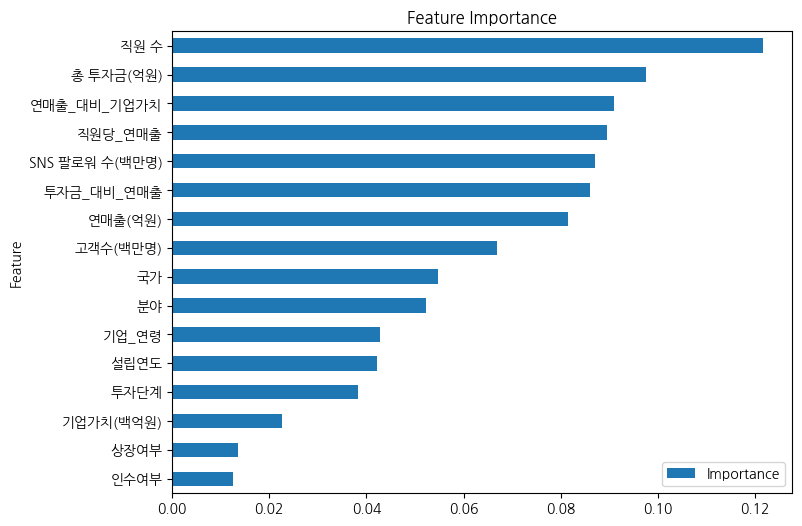

In [18]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 피처 중요도 추출
importances = model.feature_importances_
feature_names = X_train.columns

# 중요도 정렬 시각화
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feat_imp_df.plot(kind='barh', x='Feature', y='Importance', figsize=(8, 6), title="Feature Importance")
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.gca().invert_yaxis()
plt.show()

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 타겟 변수
target = '성공확률'

# 학습에 사용할 피처 (ID, 성공확률 제외)
features = [col for col in train_df.columns if col not in ['ID', target,'국가','투자단계','분야','상장여부','인수여부']]

# 문자열 컬럼 제거 (혹시 남아있다면)
X = train_df[features].select_dtypes(exclude='object')
y = train_df[target]

# 학습/검증 세트 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_val)
rmse = (mean_squared_error(y_val, y_pred))**0.5
r2 = r2_score(y_val, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 0.2386
R²: 0.0152


In [20]:
import numpy as np
import pandas as pd
from collections import Counter

def calculate_weighted_mae(y_true, y_pred):
    """
    Weighted MAE 계산 함수

    Parameters:
    - y_true: 실제값 (1D array 또는 Series)
    - y_pred: 예측값 (1D array 또는 Series)

    Returns:
    - weighted_mae: 가중 평균 절대 오차
    """
    # numpy array로 변환
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # 1. 정답값의 빈도 기반 가중치 계산
    freq = Counter(y_true)
    weights = np.array([1 / freq[val] for val in y_true])  # 빈도 낮을수록 가중치 ↑

    # 2. 가중 절대 오차 계산
    abs_errors = np.abs(y_true - y_pred)
    weighted_mae = np.sum(weights * abs_errors) / np.sum(weights)

    return weighted_mae

print("Weighted MAE:",calculate_weighted_mae(y_val,y_pred))

Weighted MAE: 0.2040129014335653


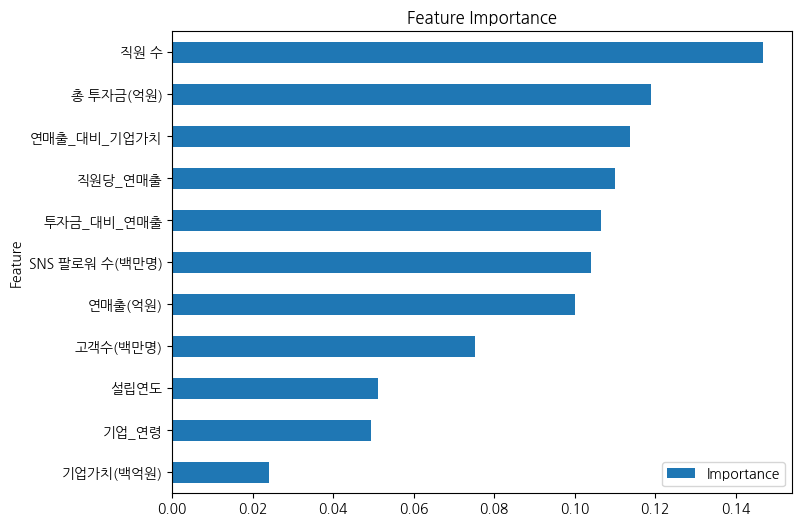

In [21]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 피처 중요도 추출
importances = model.feature_importances_
feature_names = X_train.columns

# 중요도 정렬 시각화
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feat_imp_df.plot(kind='barh', x='Feature', y='Importance', figsize=(8, 6), title="Feature Importance")
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.gca().invert_yaxis()
plt.show()

In [22]:
# test 데이터에서 학습에 사용한 동일한 feature 추출
X_test = test_df[X.columns]  # X는 train_df에서 쓰인 최종 feature set

# 예측 수행
test_preds = model.predict(X_test)

# 제출용 데이터프레임 생성
submission = pd.DataFrame({
    'ID': test_df['ID'],
    '성공확률': test_preds
})

# 결과 저장
submission.to_csv('submission.csv', index=False)

print("✅ 제출 파일 'submission.csv' 생성 완료!")

✅ 제출 파일 'submission.csv' 생성 완료!


In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# 타겟 변수
target = '성공확률'

# 학습에 사용할 피처 (ID, 성공확률 제외)
features = [col for col in train_df.columns if col not in ['ID', target,'투자단계','분야']]

# 문자열 컬럼 제거 (혹시 남아있다면)
X = train_df[features].select_dtypes(exclude='object')
y = train_df[target]

# 학습/검증 세트 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_val)
rmse = (mean_squared_error(y_val, y_pred))**0.5
r2 = r2_score(y_val, y_pred)

print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")

RMSE: 0.2402
R²: 0.0019


In [64]:
import numpy as np
import pandas as pd
from collections import Counter

def calculate_weighted_mae(y_true, y_pred):
    """
    Weighted MAE 계산 함수

    Parameters:
    - y_true: 실제값 (1D array 또는 Series)
    - y_pred: 예측값 (1D array 또는 Series)

    Returns:
    - weighted_mae: 가중 평균 절대 오차
    """
    # numpy array로 변환
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # 1. 정답값의 빈도 기반 가중치 계산
    freq = Counter(y_true)
    weights = np.array([1 / freq[val] for val in y_true])  # 빈도 낮을수록 가중치 ↑

    # 2. 가중 절대 오차 계산
    abs_errors = np.abs(y_true - y_pred)
    weighted_mae = np.sum(weights * abs_errors) / np.sum(weights)

    return weighted_mae

print("Weighted MAE:",calculate_weighted_mae(y_val,y_pred))

Weighted MAE: 0.20668708886098222


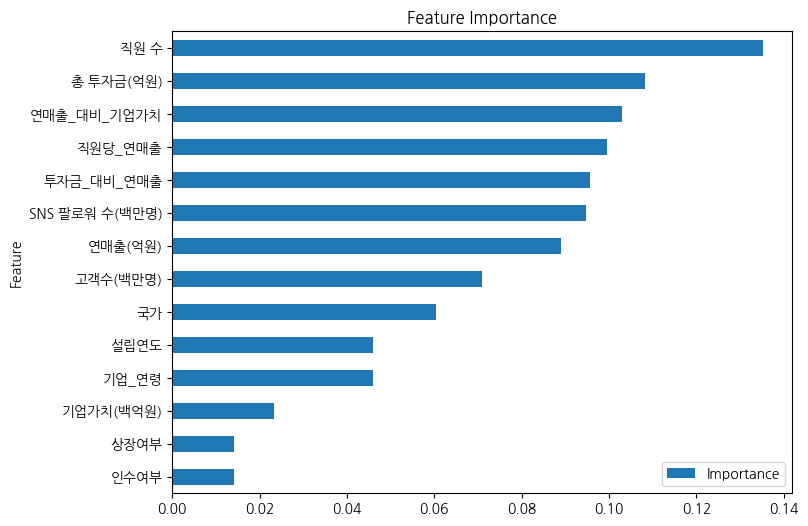

In [65]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 피처 중요도 추출
importances = model.feature_importances_
feature_names = X_train.columns

# 중요도 정렬 시각화
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feat_imp_df.plot(kind='barh', x='Feature', y='Importance', figsize=(8, 6), title="Feature Importance")
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.gca().invert_yaxis()
plt.show()

In [66]:
# test 데이터에서 학습에 사용한 동일한 feature 추출
X_test = test_df[X.columns]  # X는 train_df에서 쓰인 최종 feature set

# 예측 수행
test_preds = model.predict(X_test)

# 제출용 데이터프레임 생성
submission = pd.DataFrame({
    'ID': test_df['ID'],
    '성공확률': test_preds
})

# 결과 저장
submission.to_csv('submission.csv', index=False)

print("✅ 제출 파일 'submission.csv' 생성 완료!")

✅ 제출 파일 'submission.csv' 생성 완료!
